In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import manifold_embedding
from yellowbrick.features import pca_decomposition
import src.data.prepare as prep
import src.features as feat
import src.features.build_features



C:\Users\thomasdo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [41]:
name = '2016-10-13T1513'
data_df = prep.load_data(name, type='filtered', load_seizures=True)
raw = data_df['data']
real_seizures = data_df['real_seizures_df']
feature_df = feat.build_features.calc_features(
            raw, real_seizures, group_interval='1s')

101
275     [0.4204207276864378, 0.41667013507767514, 0.41...
276     [0.424224625766444, 0.42210779204704274, 0.415...
277     [0.42352006115299046, 0.4248657680662337, 0.41...
278     [0.42314437244549835, 0.42500324772713977, 0.4...
279     [0.42576716125968395, 0.42540834954595375, 0.4...
                              ...                        
1805    [0.412871993883019, 0.41584724956347696, 0.405...
1806    [0.4167638396495911, 0.4158032348472318, 0.416...
1807    [0.42167861812937857, 0.41925132090856787, 0.4...
1808    [0.41373955359864467, 0.41578414760993726, 0.4...
1809    [0.4233707701297467, 0.42331976403171, 0.41852...
Name: yvalue, Length: 1535, dtype: object


In [4]:
feature_df.columns

Index(['sum', 'mean', 'var', 'amax', 'manhattan_length', 'entropy', 'rms',
       'low_freq_value', 'mid_freq_value', 'high_freq_value', 's_type',
       's_type_bef', 'is_seiz'],
      dtype='object')

In [5]:
feature_df.head()

sum      mean           var      amax  manhattan_length   entropy  \
275  292.866368  0.146433  6.565344e-07  0.148633          0.025069  7.600887   
276  295.343475  0.147672  9.445549e-07  0.150255          0.022729  7.600881   
277  297.076843  0.148538  5.290696e-07  0.150494          0.021538  7.600890   
278  300.530107  0.150265  1.611578e-07  0.151283          0.022236  7.600899   
279  299.389726  0.149695  5.073333e-07  0.151007          0.022674  7.600891   

          rms  low_freq_value  mid_freq_value  high_freq_value  s_type  \
275  0.146435        0.053420        0.006228         0.018470     0.0   
276  0.147675        0.264308        0.004459         0.005550     0.0   
277  0.148540        0.118665        0.018174         0.017854     0.0   
278  0.150266        0.055128        0.001344         0.007806     0.0   
279  0.149697        0.020388        0.000652         0.003918     0.0   

     s_type_bef  is_seiz  
275         0.0      0.0  
276         0.0      0.0  
277         0.0      0.0  
278         0.0      0.0  
279         0.0      0.0

In [6]:
features = feat.build_features.get_feature_names() 
X = feat.get_X(feature_df, features)
y = feat.get_y(feature_df, 'is_seiz')

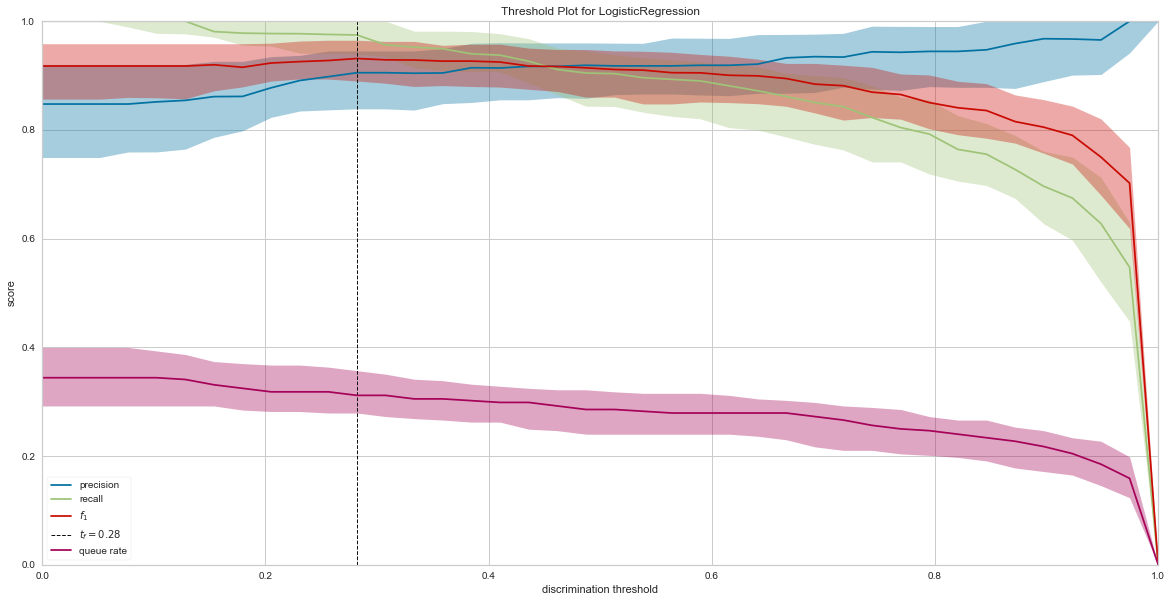

In [7]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold


# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class='ovr', solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

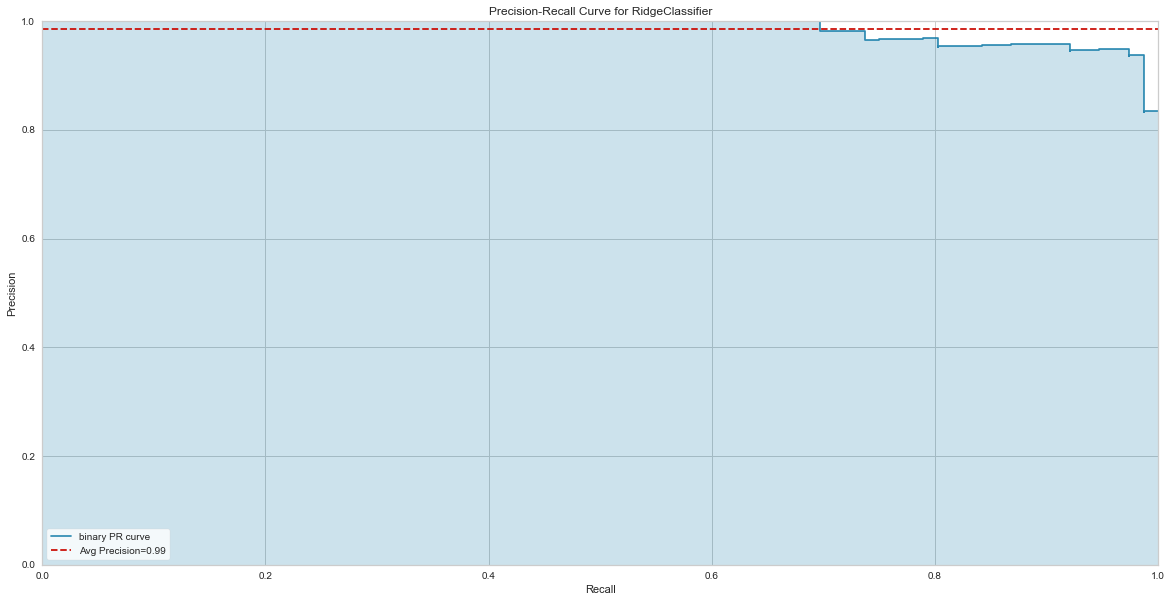

In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

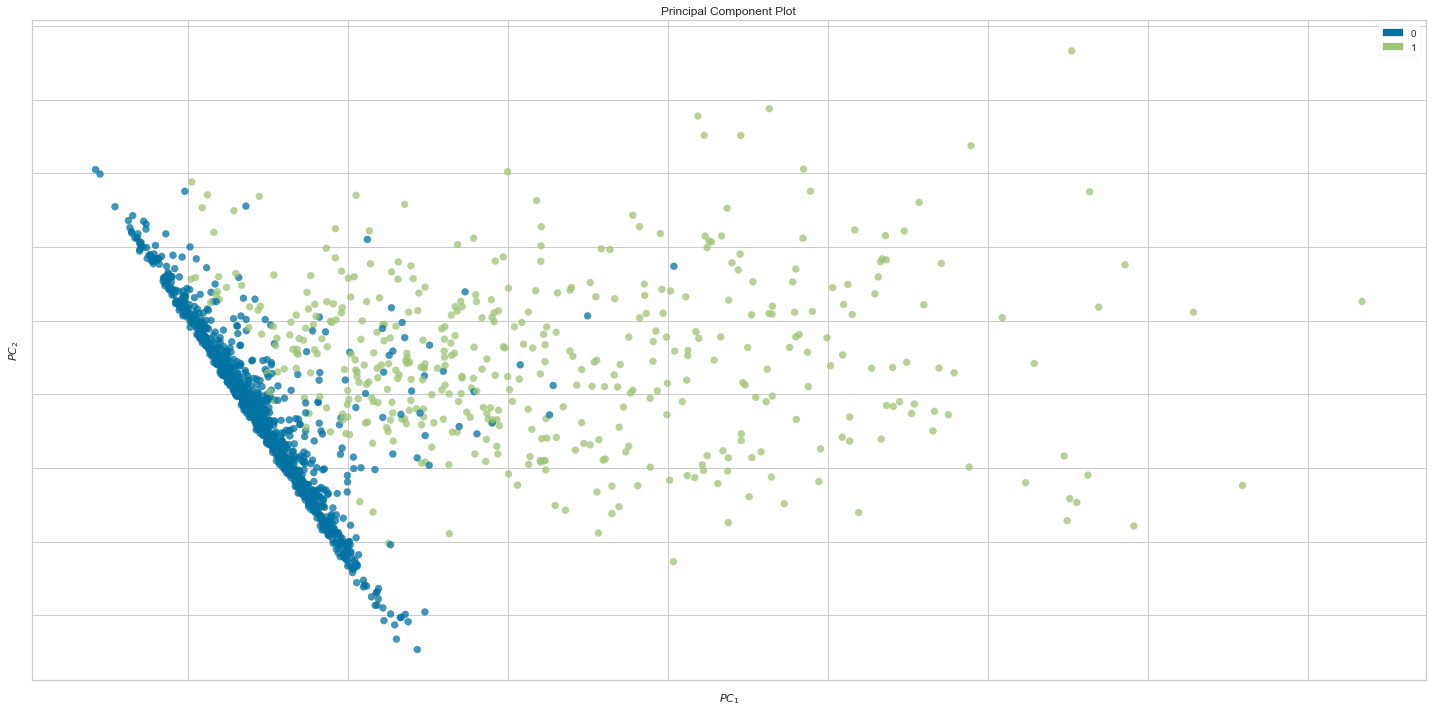

In [9]:
visualizer = pca_decomposition(X, y, classeslist=['nonictal', 'ictal'])

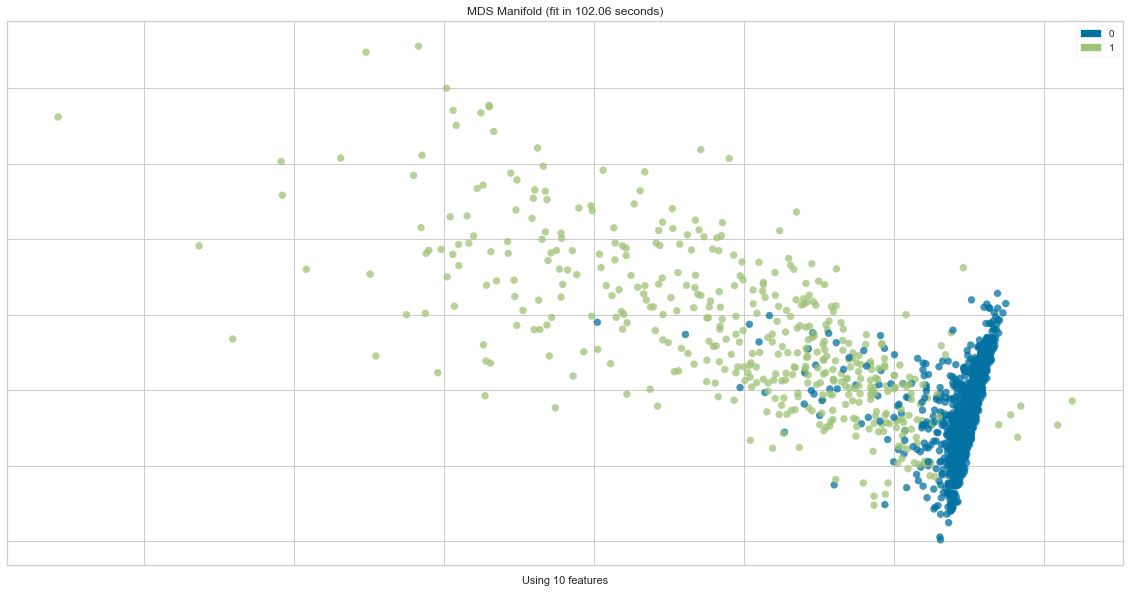

In [10]:
visualizer = manifold_embedding(X, y, target='discrete')